In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('EmailDataset.csv')
df.head()

,Label,Email
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah nt think goes usf lives around though


In [12]:
df.shape

(5565, 2)

In [13]:
df.isna().sum()

Label    0
Email    0
dtype: int64

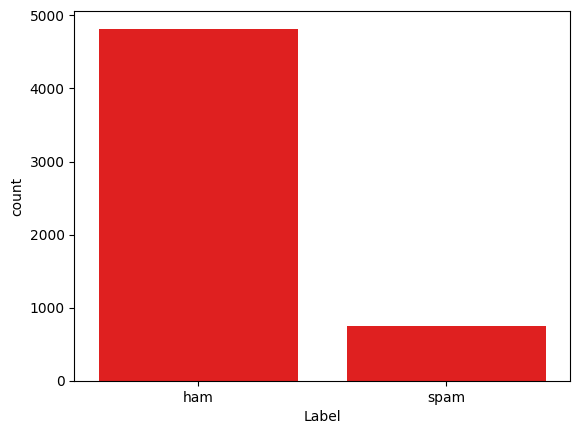

In [14]:
sns.countplot(x = 'Label', data=df, color='red')
plt.show()

In [15]:
df['Label'] = df['Label'].map({'spam':1, 'ham':0})
df['Label']

0       0
1       0
2       1
3       0
4       0
       ..
5560    1
5561    0
5562    0
5563    0
5564    0
Name: Label, Length: 5565, dtype: int64

In [16]:
X = df['Email']
X.head()

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4            nah nt think goes usf lives around though
Name: Email, dtype: object

In [17]:
y = df['Label']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Label, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
X_train.shape, y_train.shape

((4173,), (4173,))

In [22]:
X_test.shape, y_test.shape

((1392,), (1392,))

In [23]:
count = CountVectorizer()

X_train = count.fit_transform(X_train)
X_test = count.transform(X_test)

In [24]:
X_train, X_test

(<Compressed Sparse Row sparse matrix of dtype 'int64'
 	with 35482 stored elements and shape (4173, 7749)>,
 <Compressed Sparse Row sparse matrix of dtype 'int64'
 	with 10223 stored elements and shape (1392, 7749)>)

In [25]:
X_train.shape, X_test.shape

((4173, 7749), (1392, 7749))

In [26]:
params = {
    'alpha' : [0.01, 0.1, 1, 10, 100]
}

In [28]:
from sklearn.model_selection import GridSearchCV

mnb = MultinomialNB()
clf = GridSearchCV(mnb, params, scoring='f1', cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='f1')

In [29]:
clf.cv_results_

{'mean_fit_time': array([0.00320849, 0.01824927, 0.00726295, 0.00015998, 0.00329905]),
 'std_fit_time': array([0.00393513, 0.01002481, 0.00639923, 0.00031996, 0.00659809]),
 'mean_score_time': array([0.00661535, 0.0050591 , 0.00272737, 0.00312481, 0.00336523]),
 'std_score_time': array([0.00352999, 0.00414511, 0.00342229, 0.00624962, 0.00673046]),
 'param_alpha': masked_array(data=[0.01, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100}],
 'split0_test_score': array([0.92576419, 0.91914894, 0.9339207 , 0.85858586, 0.42253521]),
 'split1_test_score': array([0.9122807 , 0.90212766, 0.92982456, 0.85858586, 0.42253521]),
 'split2_test_score': array([0.89177489, 0.88235294, 0.89082969, 0.88118812, 0.4       ]),
 'split3_test_score': array([0.91358025, 0.888     , 0.89344262, 0.90731707, 0.3649635 ]),
 'split4_test_score': array([0.8974359 

In [30]:
res = clf.cv_results_
res['params']

[{'alpha': 0.01}, {'alpha': 0.1}, {'alpha': 1}, {'alpha': 10}, {'alpha': 100}]

In [31]:
print(f'PARAMETERS:\n')

for i in range(len(res["params"])):
    print(f"alpha: {res['params'][i]['alpha']}, Mean_score: {res['mean_test_score'][i]}, Rank: {res['rank_test_score'][i]}")

PARAMETERS:

alpha: 0.01, Mean_score: 0.9081671860036987, Rank: 2
alpha: 0.1, Mean_score: 0.8995224885808115, Rank: 3
alpha: 1, Mean_score: 0.9155684289853593, Rank: 1
alpha: 10, Mean_score: 0.8760097536901625, Rank: 4
alpha: 100, Mean_score: 0.39259502053108697, Rank: 5


In [32]:
model = MultinomialNB(alpha=1)
model.fit(X_train, y_train)

MultinomialNB(alpha=1)

In [33]:
y_pred = model.predict(X_test)

In [34]:
print(f'F1 Score: {f1_score(y_test,y_pred)}')

F1 Score: 0.9398907103825137
